This script check CC between reconstructed spectrogram and the original ones.

In [1]:
from dSPEECH.config import *
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


pre_all: Running from CMD.
common_dl.py: Using CUDA.


In [2]:
folder='D:/data/BaiduSyncdisk/SingleWordProductionDutch/results/reconstructed/mel_23/'
sids=[1,2,3,4,5,6,7,8,9,10]
sid=sids[0]
file_pred=folder+'sid'+str(sid)+'/pred.npy'
file_truth=folder+'sid'+str(sid)+'/truth.npy'

In [3]:
pred=np.load(file_pred) # (5997, 23)
truth=np.load(file_truth)

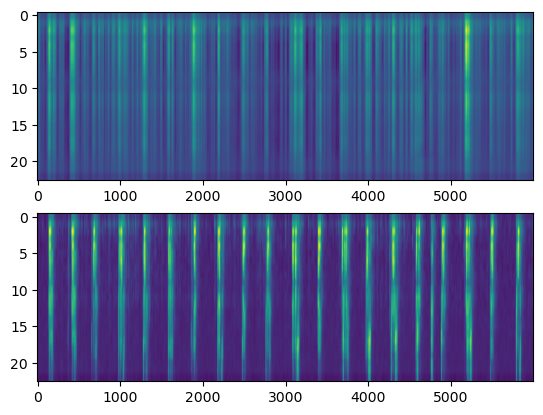

In [14]:
%matplotlib inline
fig,ax=plt.subplots(2,1)
ax[0].imshow(pred.transpose(), aspect='auto')
ax[1].imshow(truth.transpose(), aspect='auto')

In [75]:
rs=[]
for i in range(pred.shape[1]):
    r, p = pearsonr(pred[:, i], truth[:, i])
    rs.append(r)
print(sum(rs)/len(rs))

0.5853486416021314


Calculate CC if whole spectrogram matrix shifts a constant value:  the CC doesn't change.

In [78]:
rs2=[]
shift=10
for i in range(pred.shape[1]):
    r, p = pearsonr(pred[:, i]+shift, truth[:, i])
    rs2.append(r)
print(sum(rs2)/len(rs2))

0.5853486416021314


Calculate the CC using a sliding window.

Below, using a sliding window, the averaged CC is reduced significantly.

window size/CC: 20/0.08972; 50/0.18; 100/0.345; 200/0.58; 300/0.59; 400/0.59; 500/0.59; 1000/0.588; 2000/0.57; 3000/0.58; 5000/0.58;  

In [71]:
from speech_Dutch.utils import fold_2d23d
# 20*0.05=1 s
pred_list,truth_list=fold_2d23d(pred.transpose(),truth.transpose(),3000,3000,1000,1000,) # (598, 23, 20)

In [72]:
rs=[]
for i in range(pred_list.shape[0]):
    r,p= pearsonr(pred_list[i], truth_list[i],axis=1)
    rs.append(r.mean())
sum(rs)/len(rs)


0.5853486416021314